In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\shrey\Desktop\MLPP_iHUB_IITR_Sept_2023\DATA\airline_tweets.csv")

In [5]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# EDA

<Axes: xlabel='airline_sentiment', ylabel='count'>

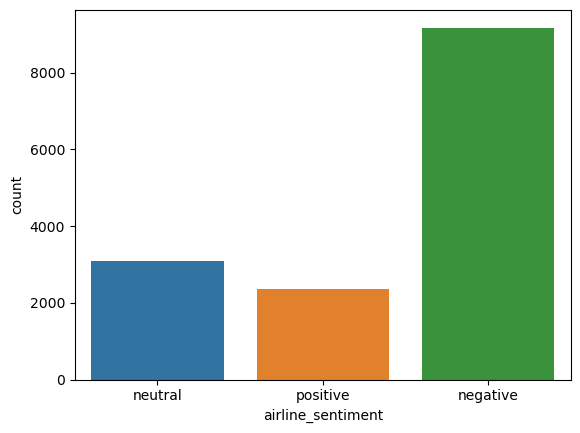

In [6]:
sns.countplot(data=df,x='airline_sentiment')

In [9]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [8]:
df['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

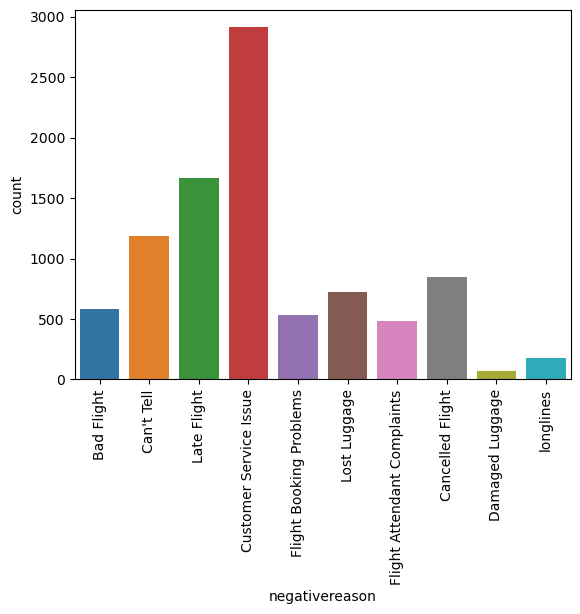

In [14]:
sns.countplot(data= df, x = 'negativereason')
plt.xticks(rotation=90);

<Axes: xlabel='airline', ylabel='count'>

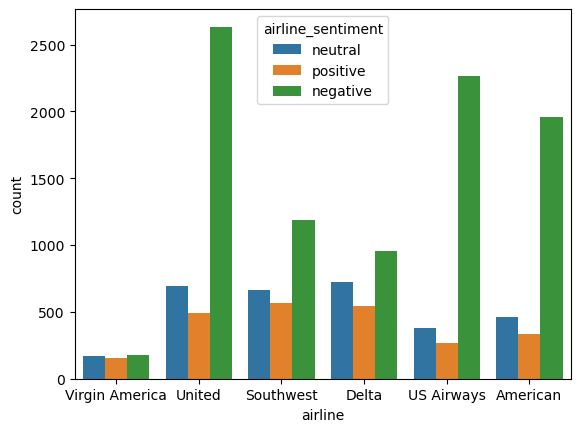

In [15]:
sns.countplot(data=df,x='airline',hue='airline_sentiment')

# Feature Extraction

In [16]:
df_new = df[['airline_sentiment','text']]
df_new.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [19]:
y = df_new['airline_sentiment']
X= df_new['text']

In [20]:
X.shape

(14640,)

In [21]:
#train test split

from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=50)

# Vectorization

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
tfidf = TfidfVectorizer(stop_words='english')

In [28]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [30]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [31]:
X_train_tfidf

<11712x13019 sparse matrix of type '<class 'numpy.float64'>'
	with 107354 stored elements in Compressed Sparse Row format>

# DO NOT USE .todense() FOR SUCH A HUGE SPARSE MATRIX

# Models Comparisons

In [32]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [35]:
from sklearn.linear_model import LogisticRegression
log_mod = LogisticRegression(max_iter=5000)
log_mod.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=5000)

In [36]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_tfidf,y_train)

RandomForestClassifier()

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_tfidf,y_train)

KNeighborsClassifier()

# Performance Evaluation

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [46]:
def performance_report(mod):
    pred = mod.predict(X_test_tfidf)
    print(classification_report(y_test,pred))
    cm = confusion_matrix(y_test,pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
    cmd.plot()

              precision    recall  f1-score   support

    negative       0.66      0.99      0.80      1835
     neutral       0.78      0.13      0.23       610
    positive       0.95      0.14      0.25       483

    accuracy                           0.67      2928
   macro avg       0.80      0.42      0.42      2928
weighted avg       0.73      0.67      0.59      2928



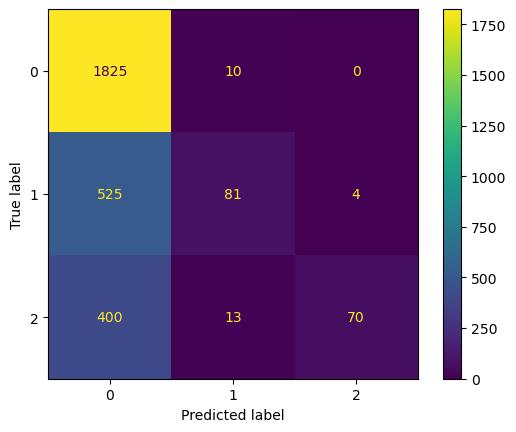

In [47]:
performance_report(nb)

              precision    recall  f1-score   support

    negative       0.80      0.92      0.86      1835
     neutral       0.60      0.46      0.52       610
    positive       0.80      0.59      0.68       483

    accuracy                           0.77      2928
   macro avg       0.74      0.66      0.69      2928
weighted avg       0.76      0.77      0.76      2928



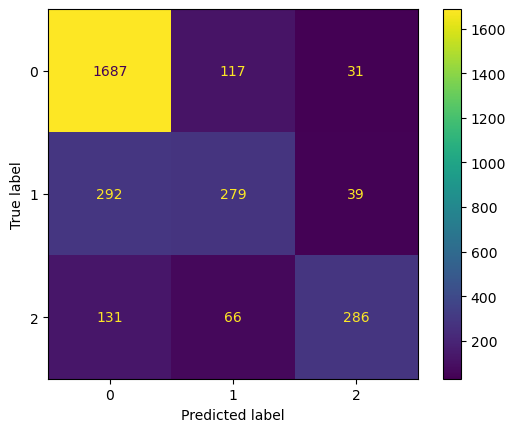

In [48]:
performance_report(log_mod)

              precision    recall  f1-score   support

    negative       0.83      0.89      0.86      1835
     neutral       0.57      0.51      0.54       610
    positive       0.76      0.64      0.70       483

    accuracy                           0.77      2928
   macro avg       0.72      0.68      0.70      2928
weighted avg       0.76      0.77      0.76      2928



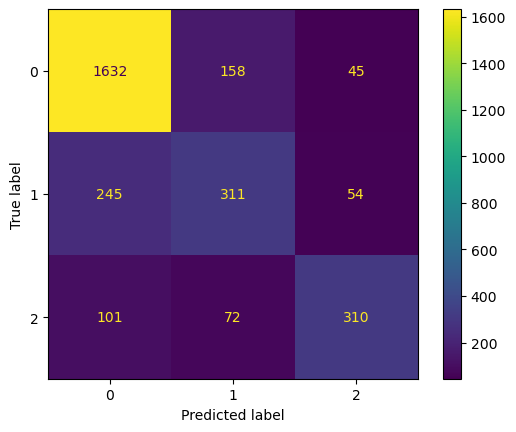

In [49]:
performance_report(svc)

              precision    recall  f1-score   support

    negative       0.78      0.93      0.85      1835
     neutral       0.61      0.38      0.47       610
    positive       0.73      0.54      0.62       483

    accuracy                           0.75      2928
   macro avg       0.71      0.62      0.65      2928
weighted avg       0.74      0.75      0.73      2928



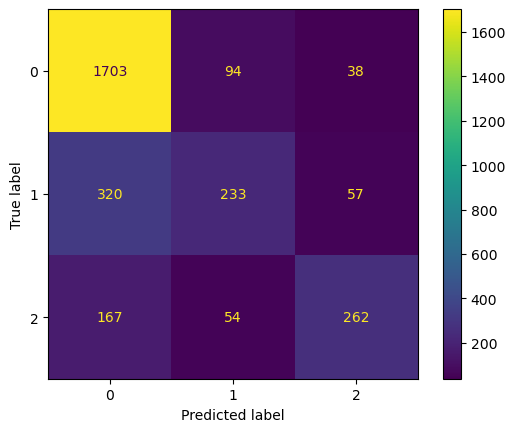

In [50]:
performance_report(rfc)

              precision    recall  f1-score   support

    negative       0.79      0.84      0.81      1835
     neutral       0.47      0.47      0.47       610
    positive       0.62      0.48      0.54       483

    accuracy                           0.70      2928
   macro avg       0.63      0.60      0.61      2928
weighted avg       0.70      0.70      0.70      2928



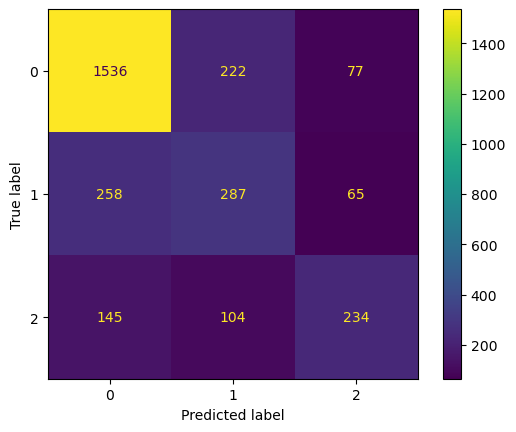

In [51]:
performance_report(knn)

# Pipeline for new incoming tweets

In [53]:
from sklearn.pipeline import Pipeline

In [54]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [55]:
pipe.fit(df['text'],df['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [56]:
new_tweet = ['very nice flight']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

In [57]:
new_tweet = ['bad flight']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [60]:
new_tweet = ['I would travel again with you']
pipe.predict(new_tweet)

array(['negative'], dtype=object)